# Part 2: Statistics

* Explain the difference between the mean and the median in your own words. In what kinds of dataset are the mean and median similar? Can you think of a dataset where the mean and median would be very different?

* Variance: Explain the variance in your own words.

* A paradox: What is Simpson's Paradox. Provide your own example of a dataset where this issue occurs.

* Correlation and causation: Explain what's funny about [this comic](https://xkcd.com/552/).

In [1]:
import urllib2
import re
from prettytable import PrettyTable

url = "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv"
data1 = urllib2.urlopen(url).read()
url = "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv"
data2 = urllib2.urlopen(url).read()
url = "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv"
data3 = urllib2.urlopen(url).read()
url = "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv"
data4 = urllib2.urlopen(url).read()
files = [data1, data2, data3, data4]

datasets = []
for f in files:
    lines = re.split(r'\n',f)
    x_values = [float(re.split(r'\t',line)[0]) for line in lines]
    y_values = [float(re.split(r'\t',line)[1]) for line in lines]
    datasets.append((x_values, y_values))

for i ,data in enumerate(datasets):
    pt = PrettyTable(field_names=['x','y'])
    for j in range(len(data[0])):
        pt.add_row([data[0][j],data[1][j]])
    print "Dataset No.", i+1
    print pt,'\n'

Dataset No. 1
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  8.04 |
| 8.0  |  6.95 |
| 13.0 |  7.58 |
| 9.0  |  8.81 |
| 11.0 |  8.33 |
| 14.0 |  9.96 |
| 6.0  |  7.24 |
| 4.0  |  4.26 |
| 12.0 | 10.84 |
| 7.0  |  4.82 |
| 5.0  |  5.68 |
+------+-------+ 

Dataset No. 2
+------+------+
|  x   |  y   |
+------+------+
| 10.0 | 9.14 |
| 8.0  | 8.14 |
| 13.0 | 8.74 |
| 9.0  | 8.77 |
| 11.0 | 9.26 |
| 14.0 | 8.1  |
| 6.0  | 6.13 |
| 4.0  | 3.1  |
| 12.0 | 9.13 |
| 7.0  | 7.26 |
| 5.0  | 4.74 |
+------+------+ 

Dataset No. 3
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  7.46 |
| 8.0  |  6.77 |
| 13.0 | 12.74 |
| 9.0  |  7.11 |
| 11.0 |  7.81 |
| 14.0 |  8.84 |
| 6.0  |  6.08 |
| 4.0  |  5.39 |
| 12.0 |  8.15 |
| 7.0  |  6.42 |
| 5.0  |  5.73 |
+------+-------+ 

Dataset No. 4
+------+------+
|  x   |  y   |
+------+------+
| 8.0  | 6.58 |
| 8.0  | 5.76 |
| 8.0  | 7.71 |
| 8.0  | 8.84 |
| 8.0  | 8.47 |
| 8.0  | 7.04 |
| 8.0  | 5.25 |
| 19.0 | 12.5 |
| 8.0  | 5.5

* Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset.\

In [2]:
import numpy as np

for i, data in enumerate(datasets):
    print "Mean of dataset %d: x=%f , y=%f" % (i+1, np.mean(data[0]), np.mean(data[1]))

Mean of dataset 1: x=9.000000 , y=7.500909
Mean of dataset 2: x=9.000000 , y=7.500909
Mean of dataset 3: x=9.000000 , y=7.500000
Mean of dataset 4: x=9.000000 , y=7.500909


* Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) stackoverflow page for help with the string formatting.

In [3]:
for i, data in enumerate(datasets):
    print "Mean of dataset %d: x=%.2f , y=%.2f" % (i+1, np.mean(data[0]), np.mean(data[1]))

Mean of dataset 1: x=9.00 , y=7.50
Mean of dataset 2: x=9.00 , y=7.50
Mean of dataset 3: x=9.00 , y=7.50
Mean of dataset 4: x=9.00 , y=7.50


* Now calculate the variance for all of the various sets of x- and y-values (to three decimal places).

In [4]:
for i, data in enumerate(datasets):
    print "Variance of dataset %d: x=%.2f , y=%.2f" % (i+1, np.var(data[0]), np.var(data[1]))

Variance of dataset 1: x=10.00 , y=3.75
Variance of dataset 2: x=10.00 , y=3.75
Variance of dataset 3: x=10.00 , y=3.75
Variance of dataset 4: x=10.00 , y=3.75


* Use numpy to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between x- and y-values for all four data sets (also to three decimal places).

In [5]:
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

#According to Wikipedia's formula:
def pearson_correlation(x,y):
    return covariance(x,y)/(np.std(x)*np.std(y))

for i, data in enumerate(datasets):
    print "Pearson correlation of dataset %d: %.3f" %(i+1, pearson_correlation(data[0],data[1]))

Pearson correlation of dataset 1: 0.898
Pearson correlation of dataset 2: 0.898
Pearson correlation of dataset 3: 0.898
Pearson correlation of dataset 4: 0.898


* The next step is use linear regression to fit a straight line $f(x)=ax+b$ through each dataset and report a and b (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress.

In [6]:
from scipy import stats

for i, data in enumerate(datasets):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[0], data[1])
    print "The straight line for dataset %d is f(x)=%.1fx+%d" % (i+1, slope, intercept)

The straight line for dataset 1 is f(x)=0.5x+3
The straight line for dataset 2 is f(x)=0.5x+3
The straight line for dataset 3 is f(x)=0.5x+3
The straight line for dataset 4 is f(x)=0.5x+3


* Finally, it's time to plot the four datasets using matplotlib.pyplot. Use a two-by-two [subplot](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same x and y range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)

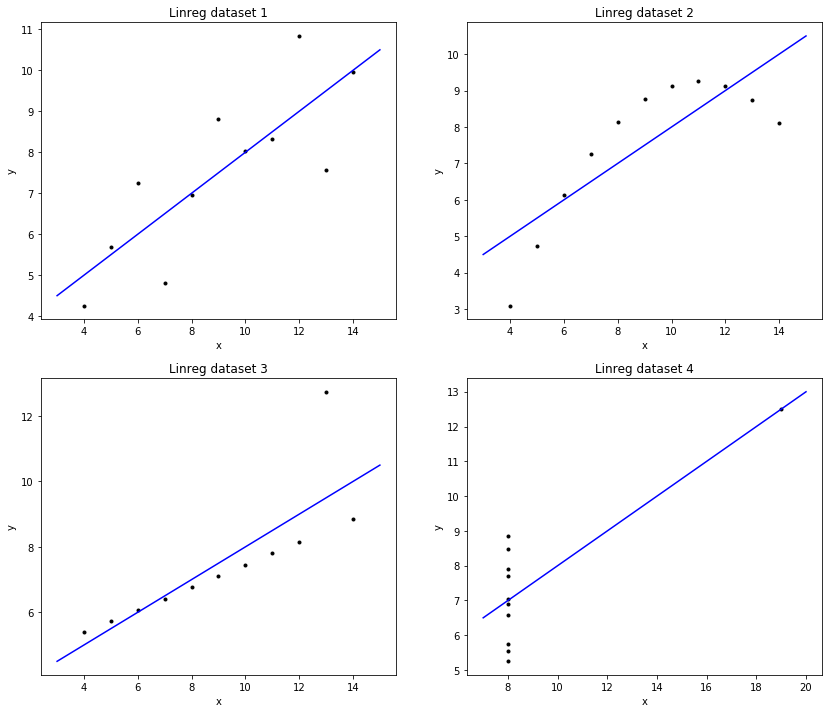

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
for i, data in enumerate(datasets):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[0],data[1])
    plt.subplot(2,2,i+1)
    plt.plot(data[0],data[1],'k.')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linreg dataset %d" %(i+1))
    x = np.linspace(min(data[0])-1,max(data[0])+1)
    y = slope*x+intercept #linear fit
    plt.plot(x,y,'b-')
plt.show()

## Part 3: Probability

In [1]:
import random
from __future__ import division

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    middle = random_kid()
    older = random_kid() 
    
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print "P(both | older):", both_girls / older_girl # 0.514 ~ 1/2 
print "P(both | either): ", both_girls / either_girl # 0.342 ~ 1/3

P(both | older): 0.491138243403
P(both | either):  0.329937822463


Let's imagine a new family with three children. Assuming that each child is equally likely to be a boy or a girl, and that the gender of each subsequent child is independent of the gender its older siblings. Use Python code to answer the following questions.

* What is the probability of three girls?
* What is the probability of two girls and one boy?
* What is the probability of one girl and two boys?
* What is the probability of three boys?

In [8]:
import random
from __future__ import division

def random_kid():
    return random.choice(["boy", "girl"])

all_girls = 0
two_girls = 0
one_girl = 0
all_boys = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    middle = random_kid()
    older = random_kid() 
    
    if older == "girl" and younger == "girl" and middle =="girl":
        all_girls += 1
    if (older == "girl" and younger == "girl" and middle == "boy") or \
    (older == "girl" and middle == "girl" and younger == "boy") or \
    (middle == "girl" and younger == "girl" and older == "boy"):
        two_girls += 1    
    if (older == "girl" and younger == "boy" and middle == "boy") or \
    (younger == "girl" and middle == "boy" and older == "boy") or \
    (middle == "girl" and younger == "boy" and older == "boy"):
        one_girl += 1 
    if older == "boy" and younger == "boy" and middle =="boy":
        all_boys += 1


print "P(all_girls): ", all_girls / 10000 # 1/8 
print "P(two_girls, one_boy): ", two_girls / 10000 # 1/8
print "P(one_girl, two_boys): ", one_girl / 10000 # 1/8
print "P(all_boys): ", all_boys / 10000 # 1/8

P(three girls): 0.0001
P(two girls): 0.1252
P(one girl): 0.2474
P(zero girls):  0.5025


* What is the probability that all children are girls given that the oldest child is a girl?
* What is the probability that all children are girls given that one of the children is a girl?

In [10]:
all_girls = 0
either_girl = 0
oldest_girl = 0

for _ in range(10000):
    youngest = random_kid()
    older = random_kid()
    oldest = random_kid()
    
    if older=="girl" and youngest=='girl' and oldest=="girl":
        all_girls+=1
    if oldest=="girl":
        oldest_girl+=1
    if older=="girl" or youngest=="girl" or oldest=="girl":
        either_girl+=1
        
print "P(all_girls | oldest_girl):", all_girls / oldest_girl # P(E|F) = P(E,F)/P(F) = 1/(2^3)/(1/2) = (1/2^3)*2 = 1/4 = 0.25
print "P(all_girls | either_girl):", all_girls / either_girl # P(E|F) = P(E,F)/P(F) = 1/(2^3)/(1-1/2^3) = 1/8 / 7/8 = 1/7

P(all_girls | oldest_girl): 0.256379344987
P(all_girls | either_girl): 0.145861911294


## Exercise on central limit theorem

*The central limit theorem is fun because we can get Gaussian distributions from probability distributions that are not Gaussian. Let's explore that in the following exercise.*
* *Use Python's random module to simulate rolling a fair six-sided die 10 000 000 times.*
* *Plot the distribution of dice rolls using a bar-chart.*

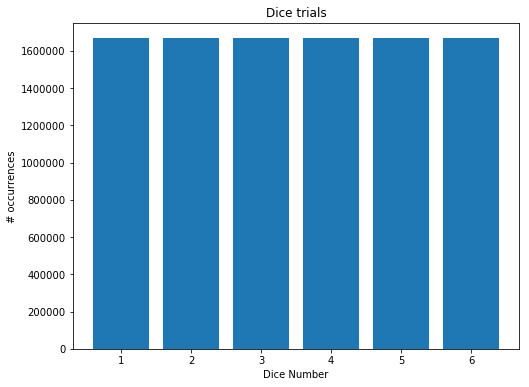

In [15]:
import random as rn
from collections import Counter
from matplotlib import pyplot as plt

results = [rn.choice(range(1,7)) for _ in range(10000000)]
results_counter = Counter(results)  

plt.figure(figsize=(8,6))
x = range(1,7)
y = [results_counter[i] for i in results_counter]
plt.bar(x,y,align="center")
plt.title("Dice trials")
plt.ylabel("# occurrences")
plt.xlabel("Dice Number")
plt.xticks(x)
plt.show()

* *Now perform a new simulation. Roll a fair six-sided dice 10 times and take the average. Do that 1 000 000 times.*
* *Plot the distribution of those average values. This time you can't use counter (since the averages are not integer values). Instead use numpy.histogram to bin those number into 25 bins. What does the numpy.histogram function return? Do the two arrays have the same length?*

In [26]:
import numpy as np

#avg_values = []
#for _ in range(1000000):
#    sum = 0
#    for _ in range(10):
#        sum = sum + rn.choice(range(1,7))
#    average = sum / 10
#    avg_values.append(average)
    
avg_values = [np.mean([rn.choice(range(1,7)) for _ in range(10)]) for _ in range(1000000)]

hist, bin_edges = np.histogram(avg_values,bins=25)
print "Same length:",len(hist)==len(bin_edges)

Same length: False


* *Then let's use matplotlib.pyplot.bar to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.*

In order to deal with the problem of the different lengths, one solution is to actually create our own bins according to the `bin_edges` obtained with `np.histogram`: to reduce the number from 26 to 25, I can create a new list of bins where the each element (**j**) is obtained as the midpoint between two edges. Then, we say that a specific element **i** in `avg_values` falls inside bin **j** if it's greater than and stricly less than (respectively) the left and right edges of the bin **j**.

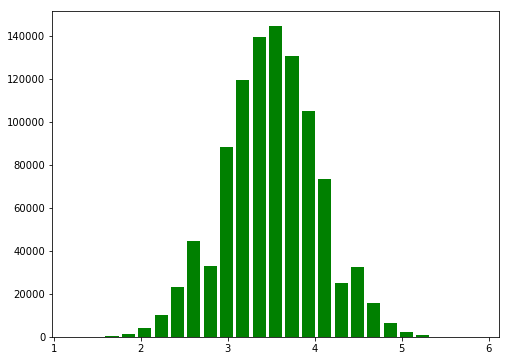

In [27]:
bins = [0]*len(hist) #Initialize new empty list of 25 zeros
bin_names = [round((bin_edges[i]+bin_edges[i+1])/2,3) for i in range(len(bin_edges)-1)] #let's keep the bin_names as the midpoint between the two edges

for i in range(len(avg_values)):
    if avg_values[i]==bin_edges[-1]: #special case: last value of bin_edges
            bins[-1]+=1
    for j in range(len(bin_edges)-1):
        if avg_values[i]>=bin_edges[j] and avg_values[i]<bin_edges[j+1]:
            bins[j]+=1
            
plt.figure(figsize=(8,6))
plt.bar(bin_names,bins,align="center",width=0.15,color="g")
plt.show()

* *Describe the shape of this distribution. Explain in your own words what happened to that flat distribution of die-rolls to suddenly make it Gaussian just by taking some averages.*

The explanation lies in the **central limit theorem**: it says (in essence) that a random variable defined as the average of a large number of independent and identically distributed random variables (in our case, the die-roll) is itself approximately normally distributed.

* *Calculate the mean $μ$ and standard deviation $σ observed$ of the averaged values. *

In [28]:
mean = np.mean(avg_values)
std = np.std(avg_values)

print "Mean:",mean
print "Standard deviation:",std

Mean: 3.5001274
Standard deviation: 0.540080182722
